# Introducción a la tarea

**Pasos a seguir:** \
    - En esta tarea deberemos resovler 4 preguntas que se nos plantean en un archivo .ipynb. \
    - También deberemos explicar y comentar las respuestas y código que realicemos para resolver las preguntas. \
    - Por último, perpararemos una presentación de 5 a 10 minutos para comentar nuestro trabajo en clase.

**Preguntas a resolver:**
+ Recibes las imágenes en los formatos JPEG, PNG y TIFF. ¿Cuál de estos formatos elegirías para conservar la calidad de las imágenes en un procesamiento detallado y por qué?
+ Escribe un código en Python para obtener 10 imágenes dentro del dataset MedMNIST Pneumonia (https://www.tensorflow.org/datasets/catalog/pneumonia_mnist) y mostrarlas en pantalla.
+ Una vez seleccionado el formato, aplica una serie de filtros para mejorar el contraste y reducir el ruido en las imágenes. ¿Por qué es importante aplicar estos ajustes antes de la segmentación de las imágenes?
+ Ahora debes aplicartécnicas de segmentación para dividir la imagen en diferentes áreas, destacando aquellas que contienen posibles anomalías. Describe las técnicas utilizadas explicando brevemente su funcionamiento.

## Pregutna 1:
    Recibes las imágenes en los formatos JPEG, PNG y TIFF. ¿Cuál de estos formatos elegirías para conservar la calidad de las imágenes en un procesamiento detallado y por qué?


Para procesar las imágenes médicas con un alto nivel de detalle, deberemos considerar la calidad y la compresión de diferentes formatos primero. \
Evaluaremos JPEG, PNG y TIFF.

· JPEG (Joint Photographic Experts Group): \
Tienen un tamaño reducido debido a su compresión con pérdida.
La compresión elimina detalles importantes, lo que puede afectar al análisis médico.
No se recomienda para procesamiento detallado debido a la pérdida de detalles y calidad mencionada.

· PNG (Portable Network Graphics): \
Usa compresión sin pérdida, lo que mantiene la calidad de la imagen.
No es tan eficiente en almacenamiento, y su soporte para imágenes médicas puede ser limitado.
Puede ser útil pero hay mejores opciones.

· TIFF (Tagged Image File Format): \
Sin compresión con pérdida, lo que mantiene el 100% de los detalles de la imagen.
Alta fidelidad en el procesamiento y compatible con herramientas médicas.
Archivos más grandes en comparación con JPEG o PNG.
Es la mejor opción para hacer análisis detallado en visión artificial y sobre todo, en diagnósticos médico.

**Formato de archivo seleccionado:**
TIFF es la mejor opción entre los 3 formatos posibles.


## Pregunta 2:
    Escribe un código en Python para obtener 10 imágenes dentro del dataset MedMNIST Pneumonia (https://www.tensorflow.org/datasets/catalog/pneumonia_mnist) y mostrarlas en pantalla.


In [344]:
#Instalamos tensorflow_datasets si no lo tenemos
#!pip install tensorflow-datasets --quiet   

In [345]:
#Importamos las librerías necesarias
import cv2  #OpenCV para procesamiento de imágenes
import numpy as np #Para manejar nuestros datos en listas
import tensorflow_datasets as tfds  #Para cargar el dataset
import matplotlib.pyplot as plt  #Para visualizar imágenes
import numpy as np  #Para operaciones numéricas

In [346]:
#Cargamos el dataset "pneumonia_mnist"
df, info = tfds.load("pneumonia_mnist", split="train", as_supervised=True, with_info=True)

#Mostramos información sobre el dataset
print(info)

tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='C:\\Users\\Felix\\tensorflow_datasets\\pneumonia_mnist\\1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, n

In [347]:
#Ahora veremos cual es la longitud del dataset de prueba, que es el que previamente hemos seleccionado, esto nos dirá de cuantas imágenes disponemos
numImages = len(list(tfds.as_numpy(df)))  
print(f"Número total de imágenes en el dataset de entrenamiento: {numImages}")


Número total de imágenes en el dataset de entrenamiento: 4708


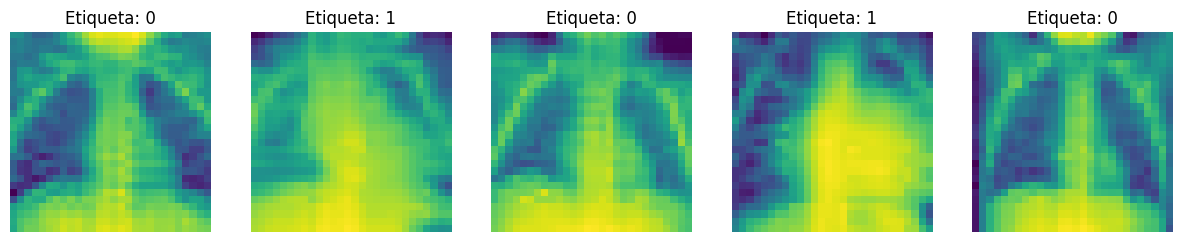

In [348]:
#Seguimos con el análisis del dataset y vamos a seleccionar las 5 primeras imagenes que contiene nuestro dataset para comprobar que todo funciona correctamente
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

#Mostramos las imágenes con sus etiquetas
for i, (img, label) in enumerate(tfds.as_numpy(df.take(5))):
    axes[i].imshow(img.squeeze())  #Mostramos las imagenes tal y como están en el dataset
    axes[i].set_title(f'Etiqueta: {label}') #Esta variable es la que almacena si la imagen tiene neumonía o no, en este caso, el 0 será negativo y el 1 positivo en neumonía
    axes[i].axis('off')

plt.show()

In [349]:
#Convertimos el dataset a un iterable de NumPy
dfNumPy = tfds.as_numpy(df.take(5))

#Recorremos las primeras 5 imágenes y mostramos su forma y etiquetas
for i, (img, label) in enumerate(dfNumPy):
    print(f"Imagen {i+1}: Shape: {img.shape}, Etiqueta: {label}")


Imagen 1: Shape: (28, 28, 1), Etiqueta: 0
Imagen 2: Shape: (28, 28, 1), Etiqueta: 1
Imagen 3: Shape: (28, 28, 1), Etiqueta: 0
Imagen 4: Shape: (28, 28, 1), Etiqueta: 1
Imagen 5: Shape: (28, 28, 1), Etiqueta: 0


Una vez llegados a este punto, vemos que el dataset tiene buena pinta y que no hay nada fuera de lo normal, las 5 primeras imagenes tienen los tamaños y valores adecuados y se muestran perfectamente, por lo tanto, podemos proceder a extraer nuestras 10 imágenes del dataset con las que trabajaremos.

Shape de las imágenes: (10, 28, 28, 1)
Etiquetas seleccionadas: [1 0 0 0 1 0 1 1 1 1]


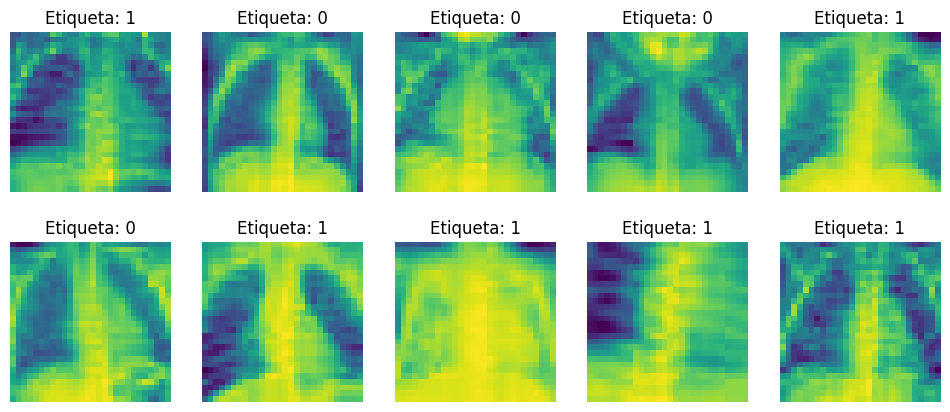

In [350]:
#Mezclamos el dataset y tomamos 10 imágenes aleatorias
datasetShuffled = df.shuffle(buffer_size=1000).take(10)

#Convertimos el dataset a NumPy para visualizarlo más tarde
imagenes = []
etiquetas = []

for img, label in tfds.as_numpy(datasetShuffled):
    imagenes.append(img)
    etiquetas.append(label)

#Convertimos las listas a arrays de NumPy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

#Mostramos la forma del dataset seleccionado
print(f"Shape de las imágenes: {imagenes.shape}")  # Esperamos (10, 28, 28, 1), 10 imágenes del tamaño visto previamente
print(f"Etiquetas seleccionadas: {etiquetas}")

#Creamos una figura para mostrar las 10 imágenes seleccionadas
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(imagenes[i].squeeze())
    ax.set_title(f'Etiqueta: {etiquetas[i]}') 
    ax.axis('off')

plt.show()



## Pregunta 3:
    Una vez seleccionado el formato, aplica una serie de filtros para mejorar el contraste y reducir el ruido en las imágenes. ¿Por qué es importante aplicar estos ajustes antes de la segmentación de las imágenes?


Primero respondemos a la pregunta realizada: ¿Por qué es importante aplicar estos ajustes antes de la segmentación de las imágenes?

· Antes de segmentar una imagen (separar áreas de interés, como anomalías médicas), es fundamental mejorar su calidad. 

-Mejora de contraste: \
Permite resaltar estructuras y detalles importantes, facilitando así la identificación de anomalías.  \
La neumonía puede ser dificil de distinguir si los valores de los píxeles son muy similares (bajo contraste).

-Reducir el ruido: \
Ayuda a elimiar interferencias, como el ruido de sensores médicos o compresión de imágenes. \
Evita que los algoritmos de segmentación confundan ruido con características importantes.

Para realizar estos dos pasos, vamos a utilizar estas dos técnicas: \
-Mejora de Contraste --> Usaremos CLAHE (Contrast Limited Adaptative Histogram Equalization). \
-Reducción de Ruido  --> Usaremos Filtro Gaussiano para suavizar la imagen.

Una vez esto explicado y realizado podremos pasar al siguiente paso, la segmentación.

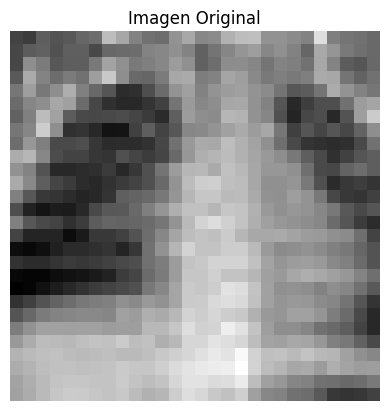

In [351]:
#Seleccionamos una imagen de las obtenidas en el paso anterior y transformamos los colores a una escala de grises
imgOriginal = imagenes[0].squeeze()  

# Mostrar la imagen original
plt.imshow(imgOriginal, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')
plt.show()

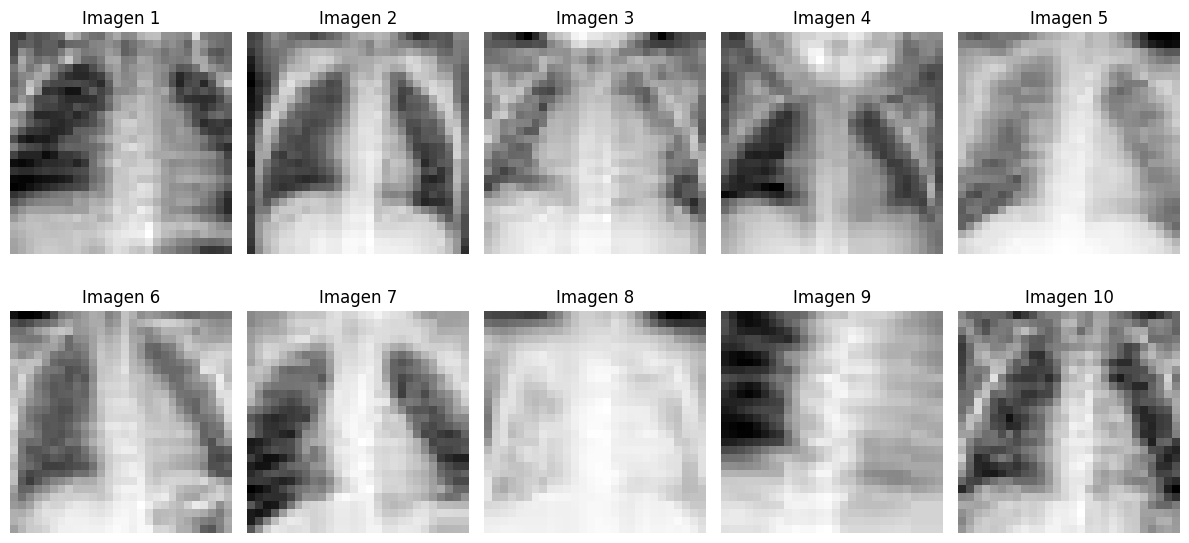

In [352]:
#Ahora hacemos lo mismo pero con las 10 imágenes

#Creamos una figura con 2 filas y 5 columnas para mostrar las 10 imágenes
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

#Recorremos las 10 imágenes seleccionadas previamente
for i, ax in enumerate(axes.flat):
    img_original = imagenes[i].squeeze() 

    #Mostramos la imagen original convertida a gris
    ax.imshow(img_original, cmap='gray')
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

#Ajustamos la distribución de las imágenes
plt.tight_layout()
plt.show()


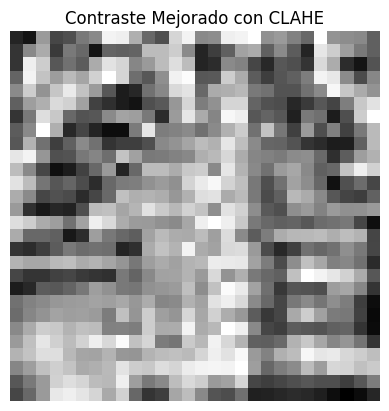

In [353]:
#Creamos la variable clahe que será la encargada de aplicar contraste a nuestras imagenes, después, visualizamos como queda en una imagen 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

#Aplicamos CLAHE a la imagen original
imgClahe = clahe.apply(imgOriginal)

#Mostramos la imagen con el contraste mejorado
plt.imshow(imgClahe, cmap='gray')
plt.title("Contraste Mejorado con CLAHE")
plt.axis('off')
plt.show()


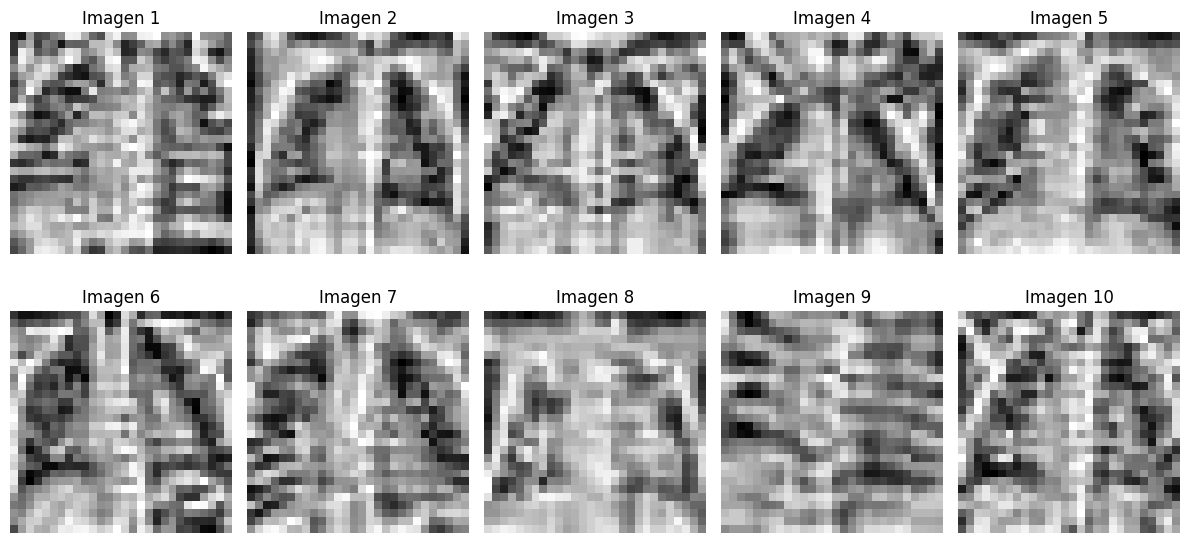

In [354]:
#Ahora extendemos el código para hacerlo a las 10 imagenes seleccionadas
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i, ax in enumerate(axes.flat):
    img_clahe = clahe.apply(imagenes[i])
    ax.imshow(img_clahe, cmap='gray')
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


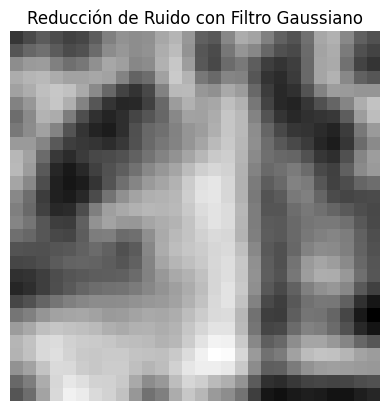

In [355]:
#Aplicamos un filtro Gaussiano para suavizar la imagen y reducir ruido
imgBlur = cv2.GaussianBlur(imgClahe, (5,5), 0)

#Mostrar la imagen después de reducción de ruido
plt.imshow(imgBlur, cmap='gray')
plt.title("Reducción de Ruido con Filtro Gaussiano")
plt.axis('off')
plt.show()


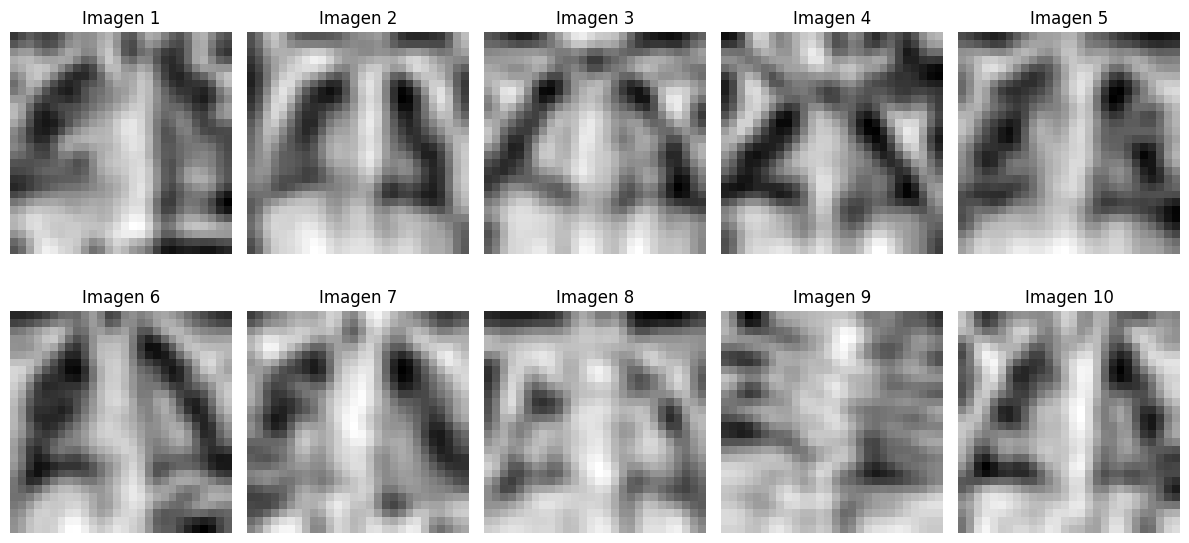

In [356]:
#Y ahora hacemos lo mismo ampliando el código para mostrar las 10 imágenes.
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    img_original = imagenes[i].squeeze() 

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_original)

    img_blur = cv2.GaussianBlur(img_clahe, (5,5), 0)

    ax.imshow(img_blur, cmap='gray')
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

# Ajustamos la distribución de las imágenes
plt.tight_layout()
plt.show()

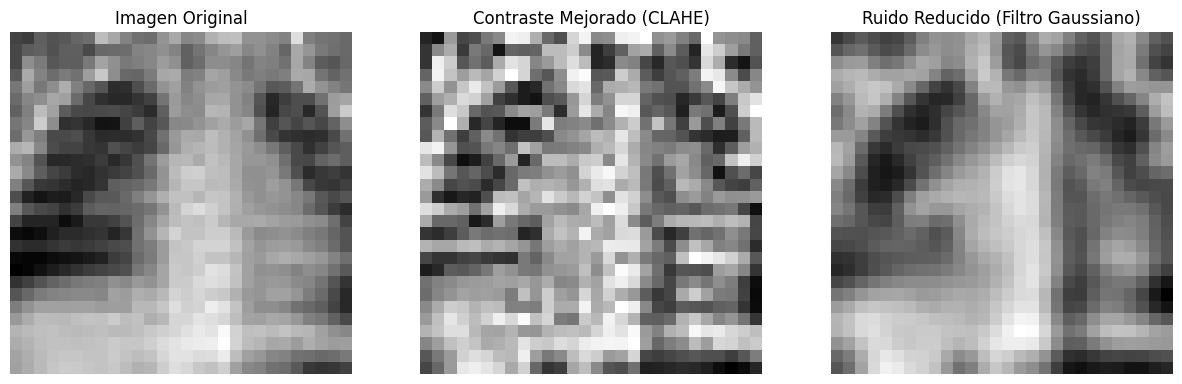

In [357]:
#Por último, comparamos las 3 imagenes que hemos extraido, la imagen original, con contraste y con reducción de ruido
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#Imagen original
axs[0].imshow(imgOriginal, cmap='gray')
axs[0].set_title("Imagen Original")
axs[0].axis('off')

#Imagen con mejora de contraste
axs[1].imshow(imgClahe, cmap='gray')
axs[1].set_title("Contraste Mejorado (CLAHE)")
axs[1].axis('off')

#Imagen con reducción de ruido
axs[2].imshow(imgBlur, cmap='gray')
axs[2].set_title("Ruido Reducido (Filtro Gaussiano)")
axs[2].axis('off')

plt.show()


## Pregunta 4:
    Ahora debes aplicartécnicas de segmentación para dividir la imagen en diferentes áreas, destacando aquellas que contienen posibles anomalías. Describe las técnicas utilizadas explicando brevemente su funcionamiento.

Voy a desglosar la segmentación en tres técnicas fundamentales:

1️⃣ Umbralización (Thresholding con OpenCV) → Para separar regiones claras/oscuras.\
2️⃣ Segmentación basada en contornos → Para detectar bordes de anomalías.\
3️⃣ Watershed → Para segmentación avanzada basada en marcadores.

Cada técnica tendrá su celda de código con explicaciones detalladas.

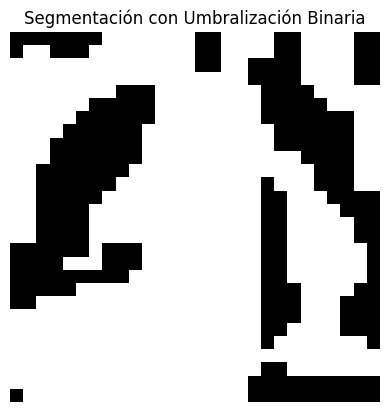

In [358]:
#Aplicamos umbralización binaria
_, imgThresh = cv2.threshold(imgBlur, 127, 255, cv2.THRESH_BINARY)

#Mostramos la imagen segmentada
plt.imshow(imgThresh, cmap='gray')
plt.title("Segmentación con Umbralización Binaria")
plt.axis('off')
plt.show()


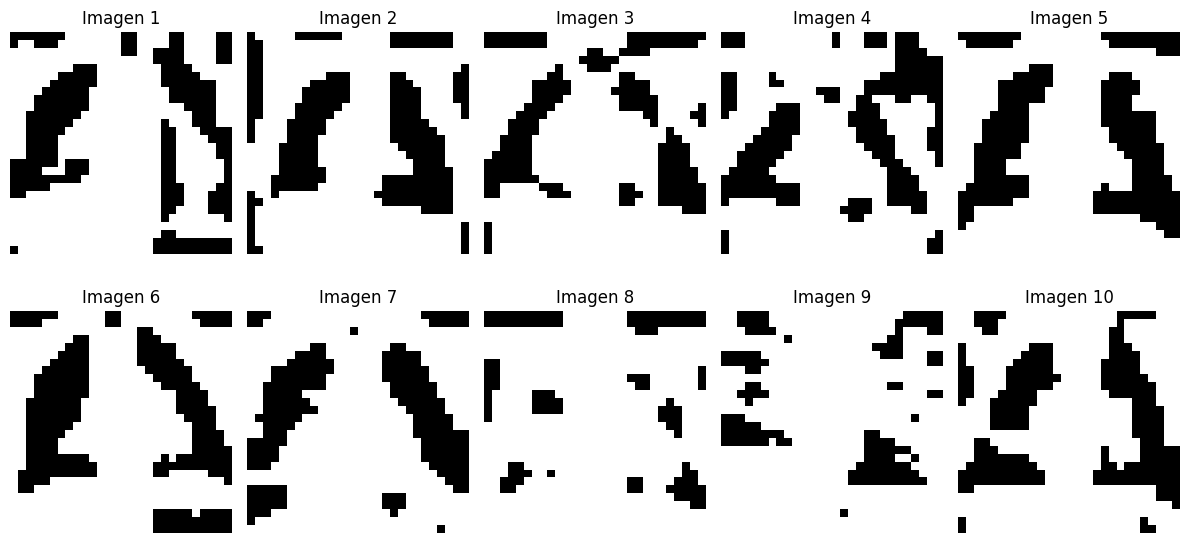

In [359]:
#Realizamos la misma segmentación umbralizada para las 10 imágenes
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    img_original = imagenes[i].squeeze()  

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_original)

    img_blur = cv2.GaussianBlur(img_clahe, (5,5), 0)

    _, img_thresh = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)

    ax.imshow(img_thresh, cmap='gray')
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

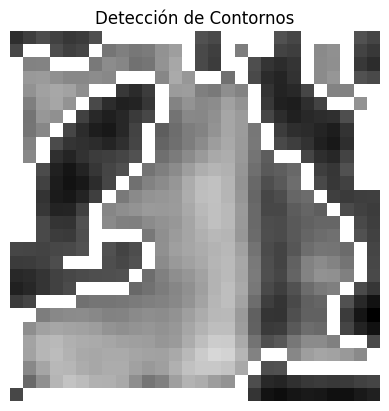

In [360]:
#Ahora vamos con la segmentación basada en contornos
contorno, _ = cv2.findContours(imgThresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Creamos una copia de la imagen para dibujar los contornos
imgContorno = np.copy(imgBlur)

#Dibujamos los contornos detectados en la imagen
cv2.drawContours(imgContorno, contorno, -1, (255,255,255), 1)

#Mostramos la imagen con los contornos detectados
plt.imshow(imgContorno, cmap='gray')
plt.title("Detección de Contornos")
plt.axis('off')
plt.show()


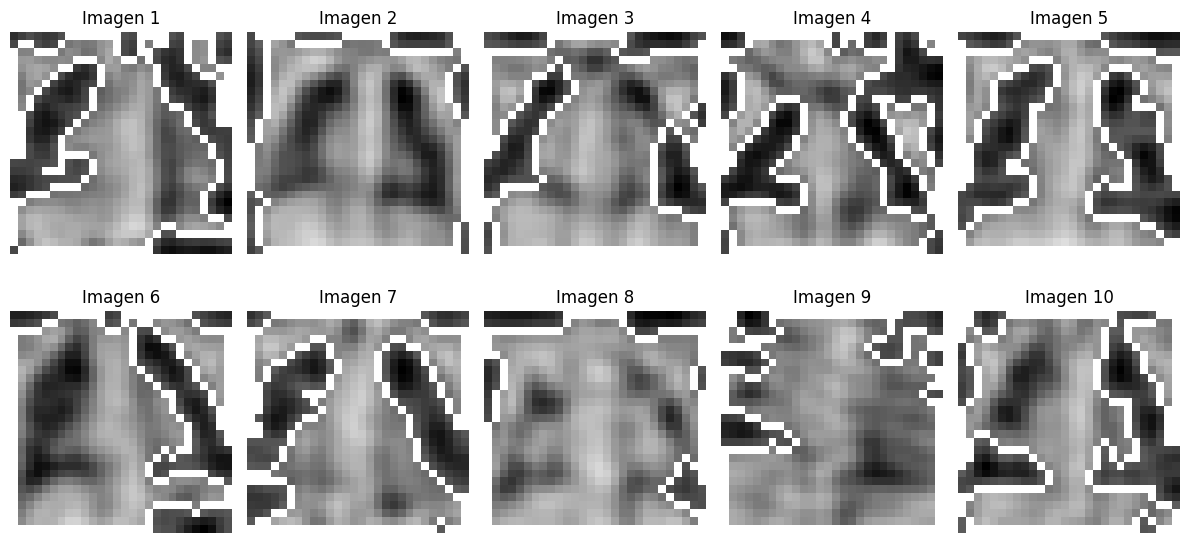

In [361]:
#Realizamos todos los pasos anteriores para mostrar las 10 imagenes con contornos
fig, axes = plt.subplots(2, 5, figsize=(12, 6))


for i, ax in enumerate(axes.flat):
    #Imagen por imagen
    img_original = imagenes[i].squeeze() 

    #Contraste
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_original)

    #Suavizado
    img_blur = cv2.GaussianBlur(img_clahe, (5,5), 0)

    #Umbralización 
    _, img_thresh = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)

    #Contorno
    contorno, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_contorno = np.copy(img_blur)
    cv2.drawContours(img_contorno, contorno, -1, (255,255,255), 1)

    #Mostramos las imágenes
    ax.imshow(img_contorno, cmap='gray')
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

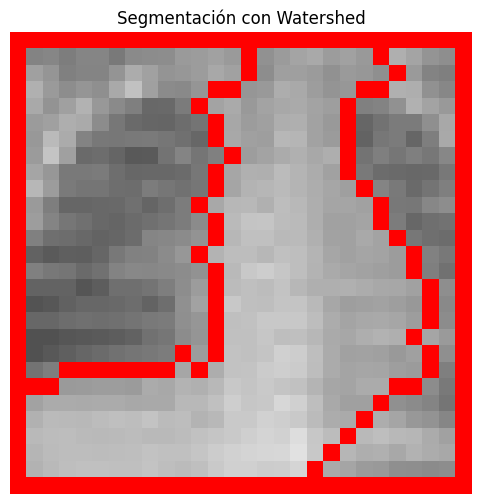

In [362]:
#Ahora vamos con el último método de segmentación, la segmentación avanzada Watershed.
#Para ello, usaremos todas las técnicas anteriores para pulir la imagen y después la procesaremos. 

#Aplicamos un filtro reducir ruido en la imagen original
imgBlur = cv2.GaussianBlur(imgOriginal, (5, 5), 0)

#Aplicamos contraste
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img_original)

#Umbralización binaria
_, imgThresh = cv2.threshold(imgBlur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Aplicamos erosión morfológica para refinar el primer plano
kernel = np.ones((3,3), np.uint8)
imgErosion = cv2.erode(imgThresh, kernel, iterations=2)  # Erosión extra para mejorar segmentación

#Identificamos el fondo seguro usando dilatación morfológica
sure_bg = cv2.dilate(imgErosion, kernel, iterations=3)

#Calculamos la Transformada de Distancia para encontrar el primer plano seguro
distanciaTransformada = cv2.distanceTransform(imgErosion, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(distanciaTransformada, 0.6 * distanciaTransformada.max(), 255, 0) 

#Determinamos las regiones desconocidas (restamos fondo y primer plano)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Creamos los marcadores para Watershed
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  #Aseguramos que el fondo tenga un valor mayor a 1
markers[unknown == 255] = 0  #Marcamos las regiones desconocidas como 0

#Aplicamos Watershed
imgWatershed = cv2.cvtColor(imgOriginal, cv2.COLOR_GRAY2BGR)  #Convertimos a BGR para mostrar en color
cv2.watershed(imgWatershed, markers)

#Dibujamos los bordes detectados en rojo con más precisión
imgWatershed[markers == -1] = [255, 0, 0]  #Bordes en rojo

#Mostramos la imagen segmentada
plt.figure(figsize=(6, 6))
plt.imshow(imgWatershed)
plt.title("Segmentación con Watershed")
plt.axis('off')
plt.show()


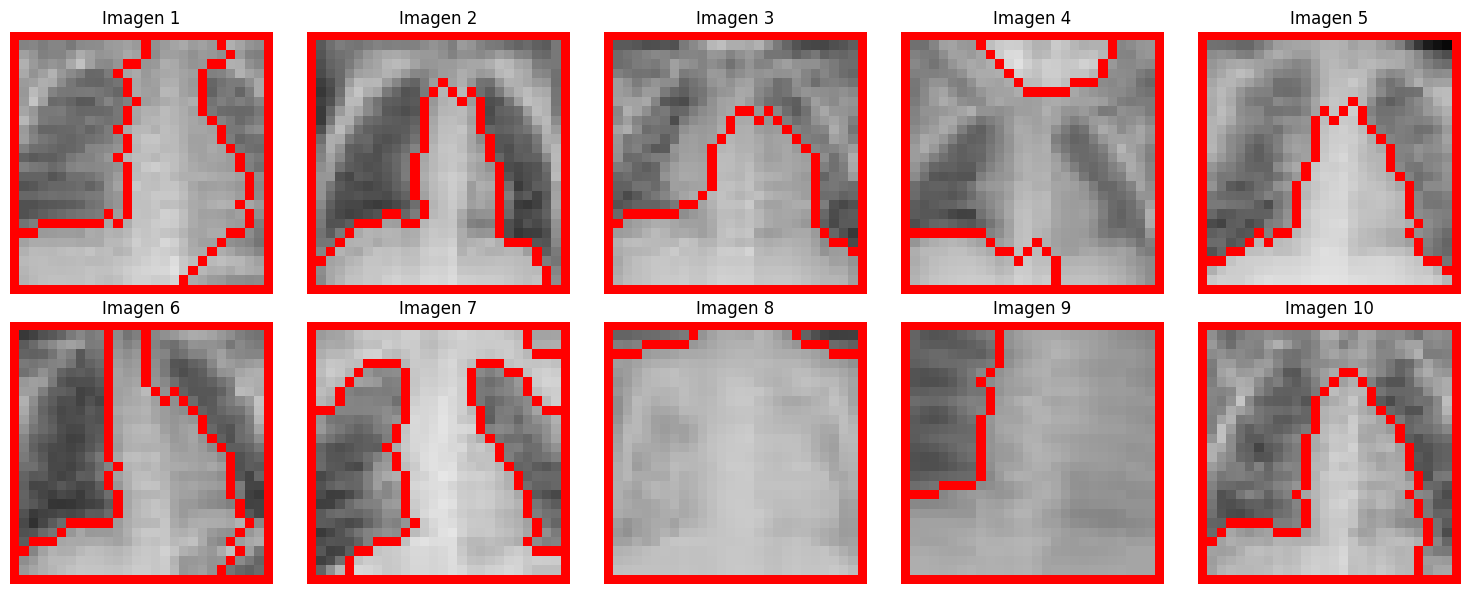

In [363]:
#Ahora hacemos lo mismo pero aplicado a las 10 imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    #Imagen por imagen
    img_original = imagenes[i].squeeze()  

    #Contraste
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_original)
    
    #Suavizado
    img_blur = cv2.GaussianBlur(img_original, (5, 5), 0)

    #Umbralización
    _, img_thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #Realizamos todos los pasos anteriores:
    kernel = np.ones((3,3), np.uint8)
    img_eroded = cv2.erode(img_thresh, kernel, iterations=2)  
    
    sure_bg = cv2.dilate(img_eroded, kernel, iterations=3)

    dist_transform = cv2.distanceTransform(img_eroded, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.6 * dist_transform.max(), 255, 0) 

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1  
    markers[unknown == 255] = 0  

    img_watershed = cv2.cvtColor(img_original, cv2.COLOR_GRAY2BGR)
    cv2.watershed(img_watershed, markers)

    img_watershed[markers == -1] = [255, 0, 0]

    #Mostramos las imágenes
    ax.imshow(img_watershed)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

#Ajustamos la distribución de las imágenes
plt.tight_layout()
plt.show()
